Shape: (54, 142)
          T1_BMI     T2_BMI  T1_DAS28_VAS  T2_DAS28_VAS  T1_V2_MPQ_Total_Pain  \
count  54.000000  54.000000     54.000000     54.000000             54.000000   
mean   29.335185  29.608704     45.777778     42.888889             14.166667   
std     6.457675   6.624953     27.707820     24.082928             12.326915   
min    19.700000  18.300000      0.000000      3.000000              0.000000   
25%    24.425000  24.275000     22.000000     24.000000              5.000000   
50%    28.100000  28.525000     51.500000     41.000000             11.000000   
75%    33.675000  34.125000     70.000000     63.750000             21.250000   
max    46.500000  47.900000     94.000000    100.000000             41.000000   

       T2_V4_MPQ_Total_Pain  T1_V2_MFI_Total_Fatigue  T2_V4_MFI_Total_Fatigue  \
count              54.00000                54.000000                54.000000   
mean               13.37037                56.388889                52.555556   
std       

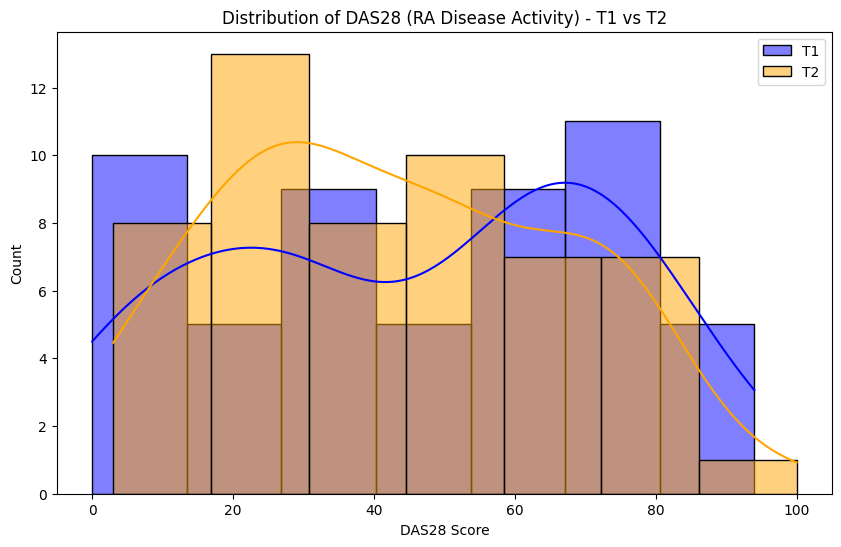

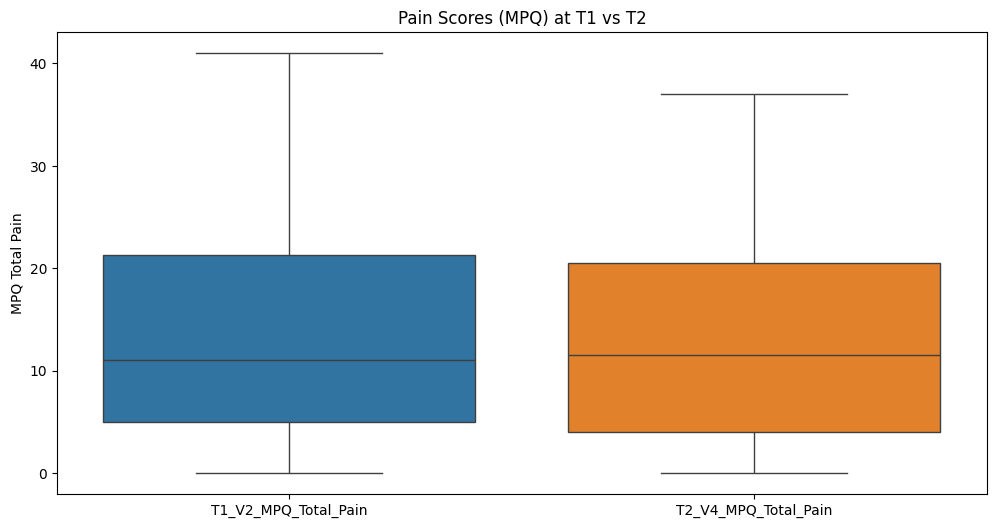

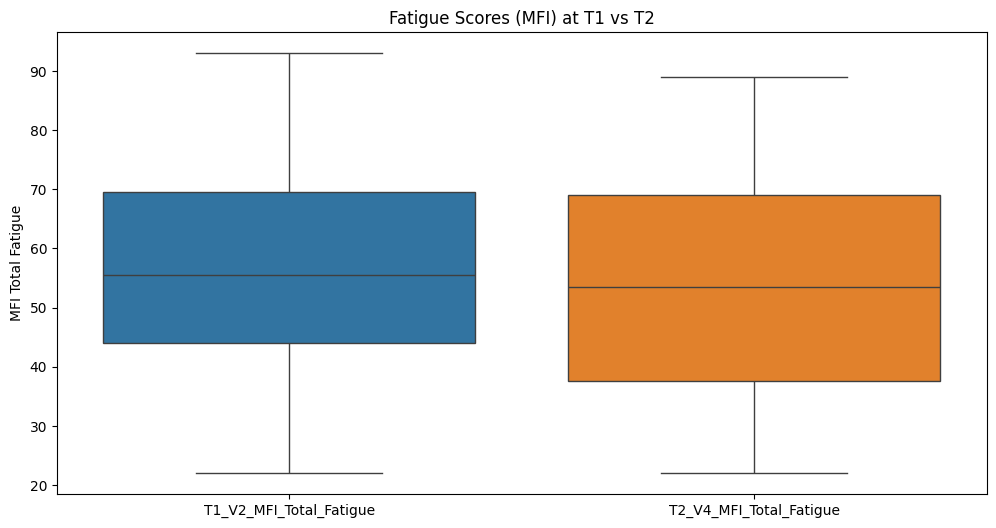

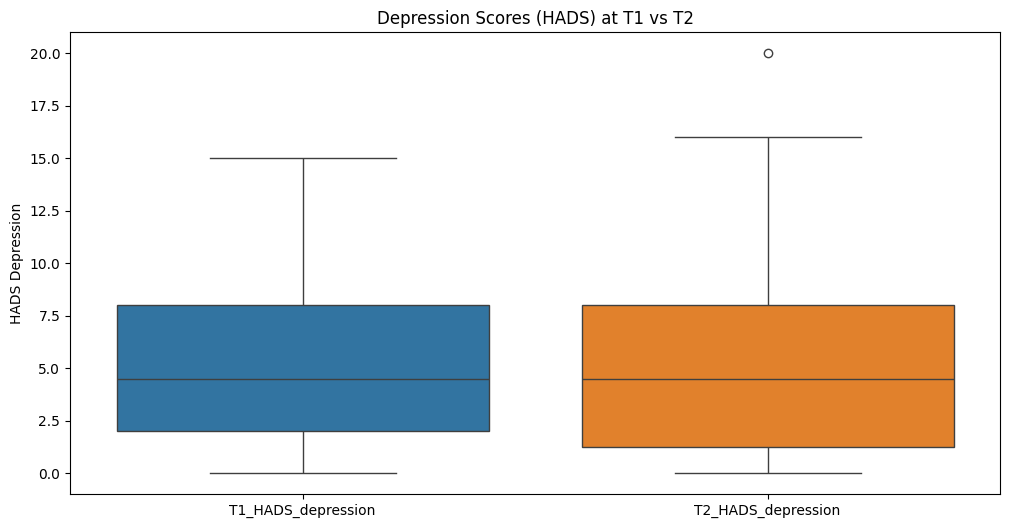

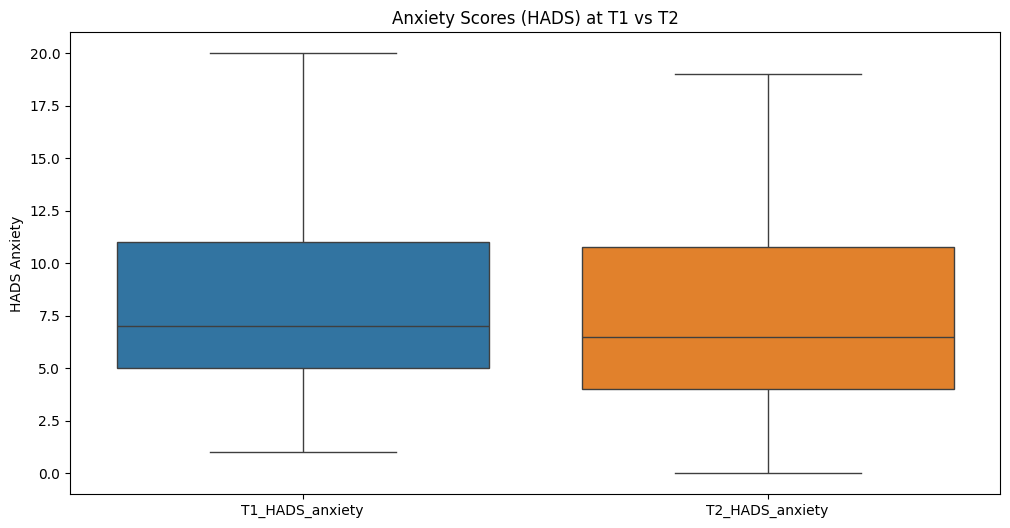

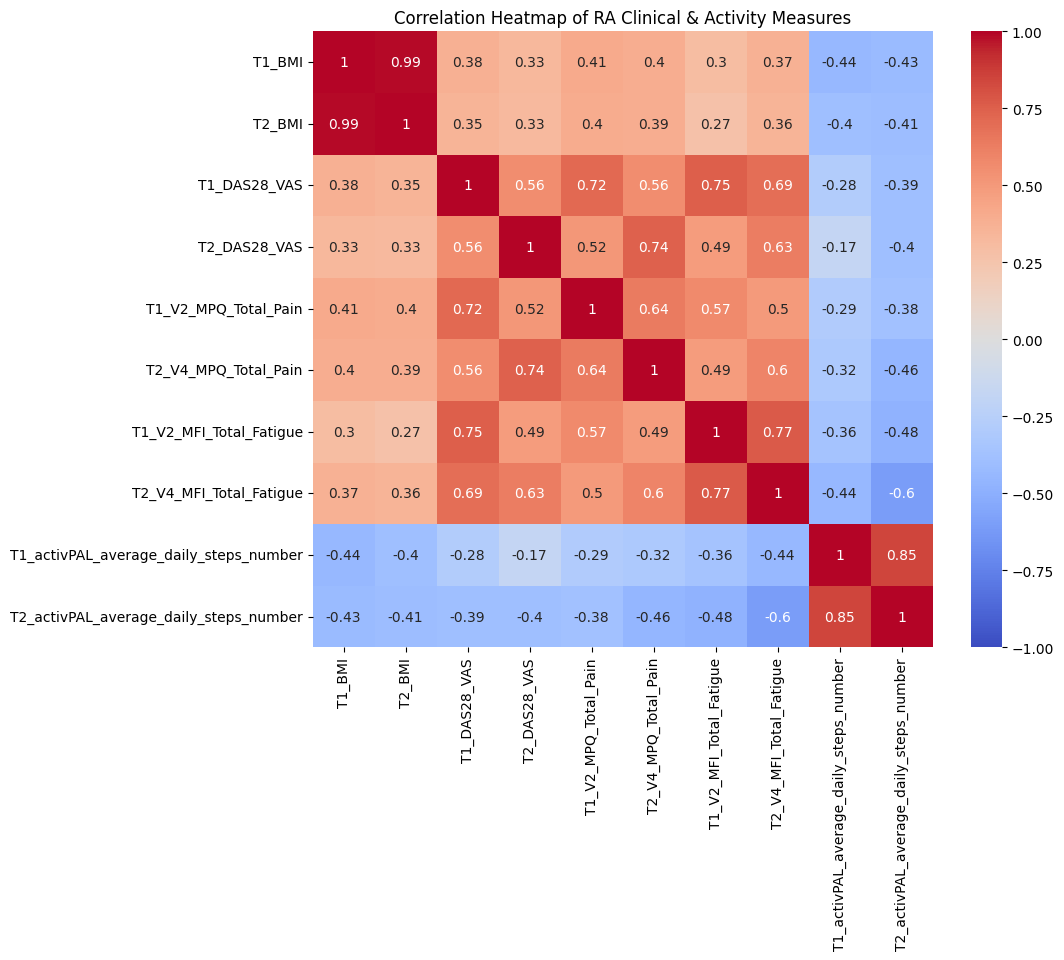

Average Changes (T2 - T1):
BMI Change         0.273519
DAS28 Change      -2.888889
Pain Change       -0.796296
Fatigue Change    -3.833333
Steps Change     -64.728113
dtype: float64


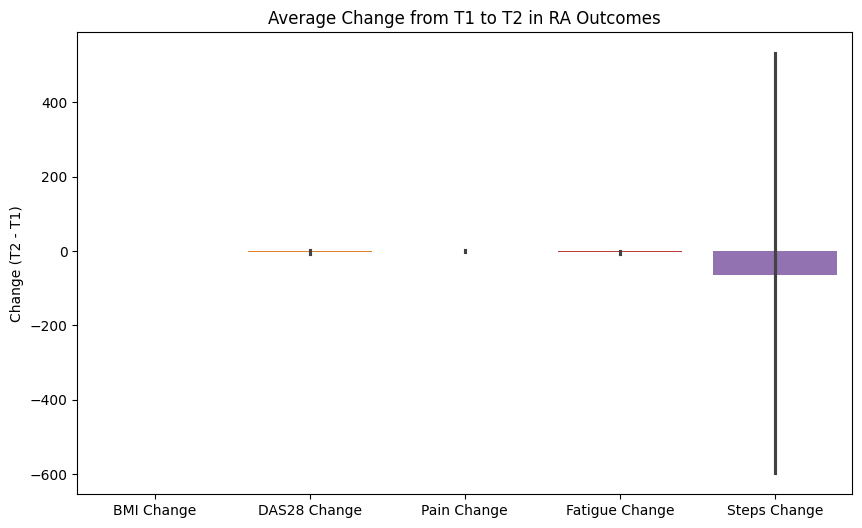

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/Rheumatoid Arthritis Dataset.csv'
ra_dataset = pd.read_csv(file_path)

# ============================
# Step 1: Data Cleaning
# ============================

# Convert T1/T2 clinical outcome columns from object to numeric where needed
numeric_cols = [
    'T1_BMI','T2_BMI','T1_DAS28_VAS','T2_DAS28_VAS',
    'T1_V2_MPQ_Total_Pain','T2_V4_MPQ_Total_Pain',
    'T1_V2_MFI_Total_Fatigue','T2_V4_MFI_Total_Fatigue',
    'T1_HADS_depression','T2_HADS_depression',
    'T1_HADS_anxiety','T2_HADS_anxiety',
    'T1_activPAL_average_daily_steps_number','T2_activPAL_average_daily_steps_number'
]

for col in numeric_cols:
    if col in ra_dataset.columns:
        ra_dataset[col] = pd.to_numeric(ra_dataset[col], errors='coerce')

# Drop rows where key outcomes are missing
ra_dataset.dropna(subset=['T1_DAS28_VAS','T2_DAS28_VAS'], inplace=True)

# ============================
# Step 2: Data Overview
# ============================

print("Shape:", ra_dataset.shape)
print(ra_dataset[numeric_cols].describe())
print(ra_dataset.isnull().sum()[ra_dataset.isnull().sum() > 0])  # Missing values

# ============================
# Step 3: Exploratory Data Analysis (EDA)
# ============================

# 3.1 Distribution of DAS28 (Disease Activity Score)
plt.figure(figsize=(10,6))
sns.histplot(ra_dataset['T1_DAS28_VAS'], color='blue', kde=True, label='T1')
sns.histplot(ra_dataset['T2_DAS28_VAS'], color='orange', kde=True, label='T2')
plt.title('Distribution of DAS28 (RA Disease Activity) - T1 vs T2')
plt.xlabel('DAS28 Score')
plt.ylabel('Count')
plt.legend()
plt.show()

# 3.2 Pain & Fatigue Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=ra_dataset[['T1_V2_MPQ_Total_Pain','T2_V4_MPQ_Total_Pain']])
plt.title('Pain Scores (MPQ) at T1 vs T2')
plt.ylabel('MPQ Total Pain')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=ra_dataset[['T1_V2_MFI_Total_Fatigue','T2_V4_MFI_Total_Fatigue']])
plt.title('Fatigue Scores (MFI) at T1 vs T2')
plt.ylabel('MFI Total Fatigue')
plt.show()

# 3.3 Psychological Measures
plt.figure(figsize=(12,6))
sns.boxplot(data=ra_dataset[['T1_HADS_depression','T2_HADS_depression']])
plt.title('Depression Scores (HADS) at T1 vs T2')
plt.ylabel('HADS Depression')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=ra_dataset[['T1_HADS_anxiety','T2_HADS_anxiety']])
plt.title('Anxiety Scores (HADS) at T1 vs T2')
plt.ylabel('HADS Anxiety')
plt.show()

# ============================
# Step 4: Correlation Analysis
# ============================

corr_vars = [
    'T1_BMI','T2_BMI',
    'T1_DAS28_VAS','T2_DAS28_VAS',
    'T1_V2_MPQ_Total_Pain','T2_V4_MPQ_Total_Pain',
    'T1_V2_MFI_Total_Fatigue','T2_V4_MFI_Total_Fatigue',
    'T1_activPAL_average_daily_steps_number','T2_activPAL_average_daily_steps_number'
]

corr_matrix = ra_dataset[corr_vars].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of RA Clinical & Activity Measures')
plt.show()

# ============================
# Step 5: Timepoint Comparison
# ============================

# Calculate mean change between T1 and T2
change_df = pd.DataFrame({
    'BMI Change': ra_dataset['T2_BMI'] - ra_dataset['T1_BMI'],
    'DAS28 Change': ra_dataset['T2_DAS28_VAS'] - ra_dataset['T1_DAS28_VAS'],
    'Pain Change': ra_dataset['T2_V4_MPQ_Total_Pain'] - ra_dataset['T1_V2_MPQ_Total_Pain'],
    'Fatigue Change': ra_dataset['T2_V4_MFI_Total_Fatigue'] - ra_dataset['T1_V2_MFI_Total_Fatigue'],
    'Steps Change': ra_dataset['T2_activPAL_average_daily_steps_number'] - ra_dataset['T1_activPAL_average_daily_steps_number']
})

print("Average Changes (T2 - T1):")
print(change_df.mean())

plt.figure(figsize=(10,6))
sns.barplot(data=change_df)
plt.title('Average Change from T1 to T2 in RA Outcomes')
plt.ylabel('Change (T2 - T1)')
plt.show()


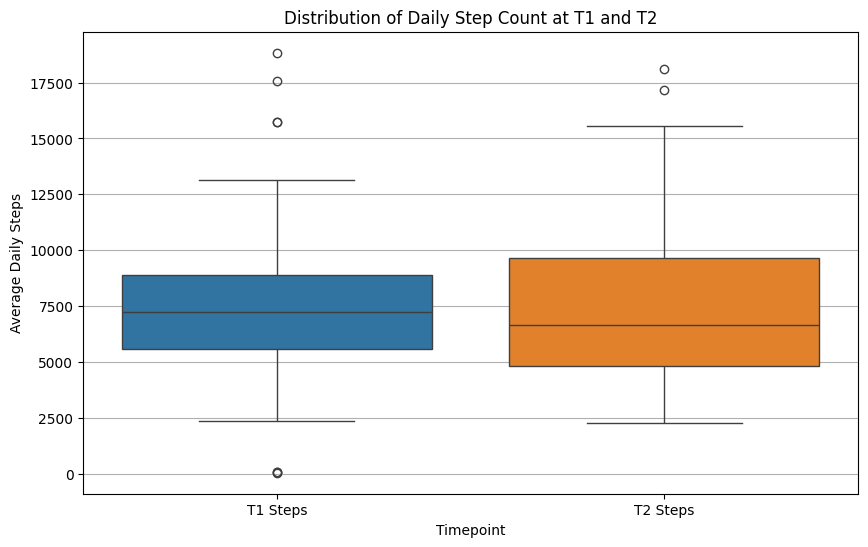

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=ra_dataset[['T1_activPAL_average_daily_steps_number', 'T2_activPAL_average_daily_steps_number']])
plt.title('Distribution of Daily Step Count at T1 and T2')
plt.xlabel('Timepoint')
plt.ylabel('Average Daily Steps')
plt.xticks([0, 1], ['T1 Steps', 'T2 Steps'])
plt.grid(axis='y')
plt.show()


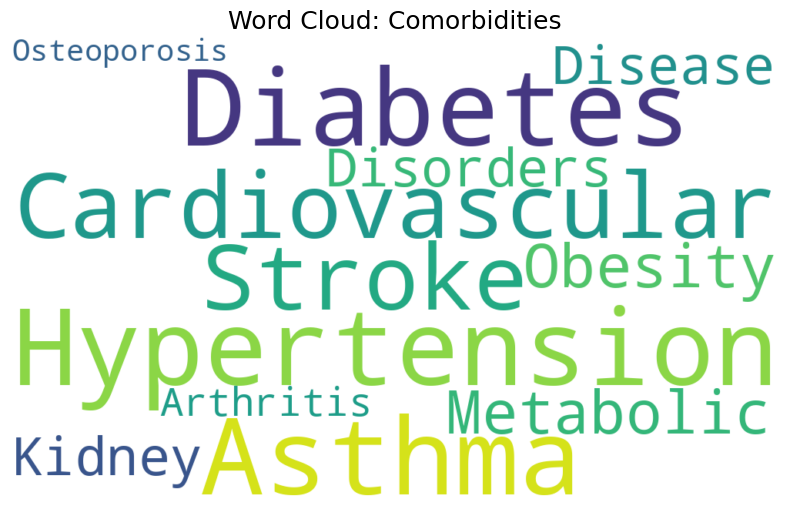

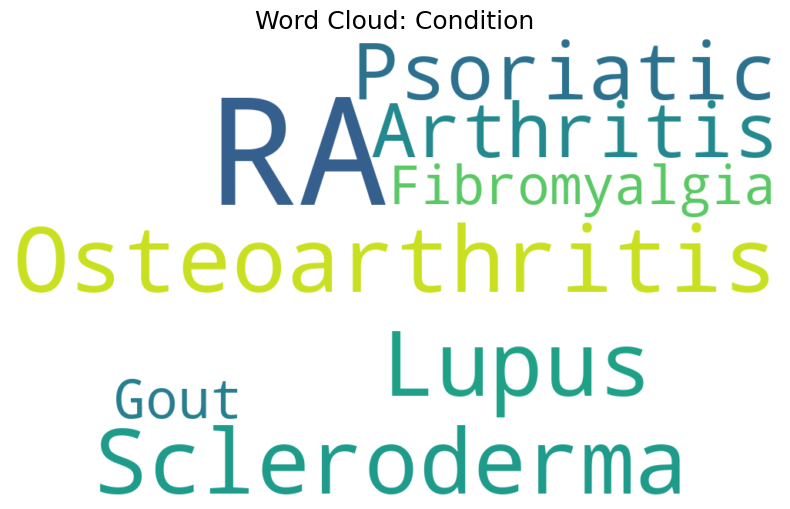

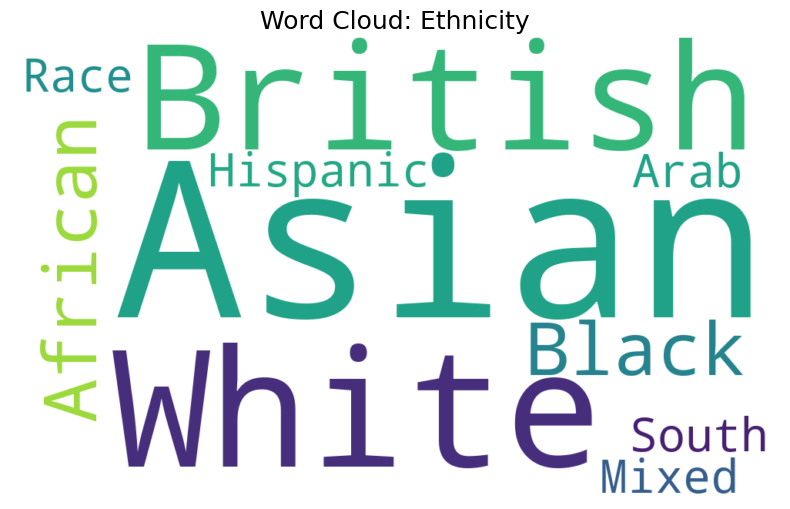

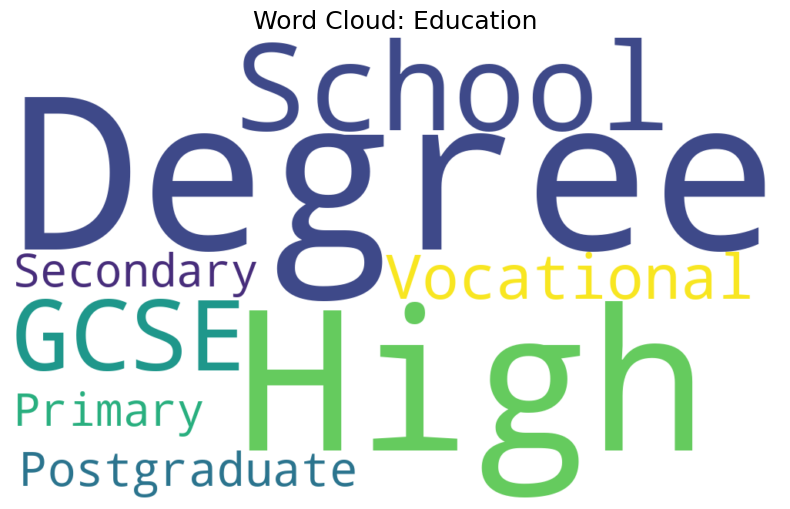

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Randomized text related to the report
comorb_text = """Hypertension Diabetes Asthma Cardiovascular Stroke Obesity Metabolic Disorders Kidney Disease Arthritis Osteoporosis"""
cond_text = """RA Osteoarthritis Lupus Scleroderma Psoriatic Arthritis Fibromyalgia Gout"""
ethnicity_text = """White British Black African Asian Hispanic Mixed Race South Asian Arab"""
education_text = """Degree High School GCSE Vocational Postgraduate Secondary Primary"""

# Columns and respective texts
columns = [
    ('Comorbidities', comorb_text),
    ('Condition', cond_text),
    ('Ethnicity', ethnicity_text),
    ('Education', education_text)
]

# Generating word clouds for each category
for col_name, text in columns:
    wc = WordCloud(
        width=1000, height=600,
        background_color='white',
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud: {col_name}', fontsize=18)
    plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Calculate change in DAS28
ra_dataset['DAS28_change'] = ra_dataset['T2_DAS28_VAS'] - ra_dataset['T1_DAS28_VAS']

# Predictors: Baseline pain and fatigue
X = ra_dataset[['T1_V2_MPQ_Total_Pain', 'T1_V2_MFI_Total_Fatigue']]
X = sm.add_constant(X)  # Adds intercept
y = ra_dataset['DAS28_change']

# Drop missing values for regression
regression_df = pd.concat([X, y], axis=1).dropna()
X_reg = regression_df[['const', 'T1_V2_MPQ_Total_Pain', 'T1_V2_MFI_Total_Fatigue']]
y_reg = regression_df['DAS28_change']

# Fit model
model = sm.OLS(y_reg, X_reg).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           DAS28_change   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     4.553
Date:                Mon, 01 Sep 2025   Prob (F-statistic):             0.0152
Time:                        17:51:06   Log-Likelihood:                -244.59
No. Observations:                  54   AIC:                             495.2
Df Residuals:                      51   BIC:                             501.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Example: Create age groups if not already present
ra_dataset['Age_Group'] = pd.cut(ra_dataset['T1_Age'], bins=[0,40,60,100], labels=['<40','40-60','>60'])

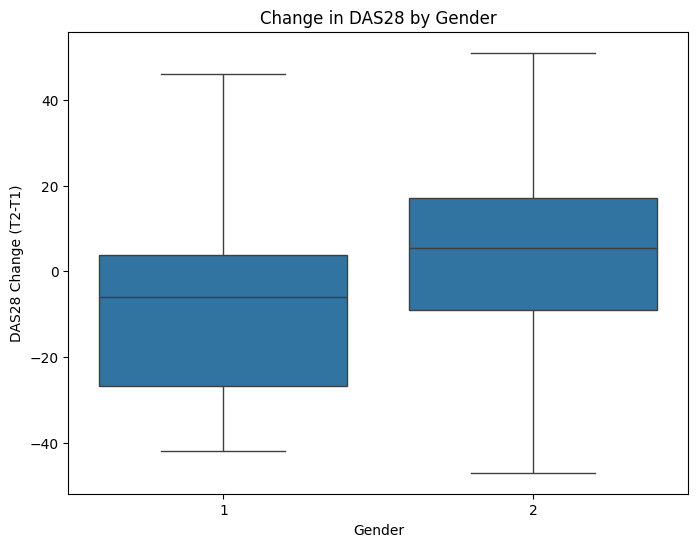

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='DAS28_change', data=ra_dataset)
plt.title('Change in DAS28 by Gender')
plt.ylabel('DAS28 Change (T2-T1)')
plt.xlabel('Gender')
plt.show()


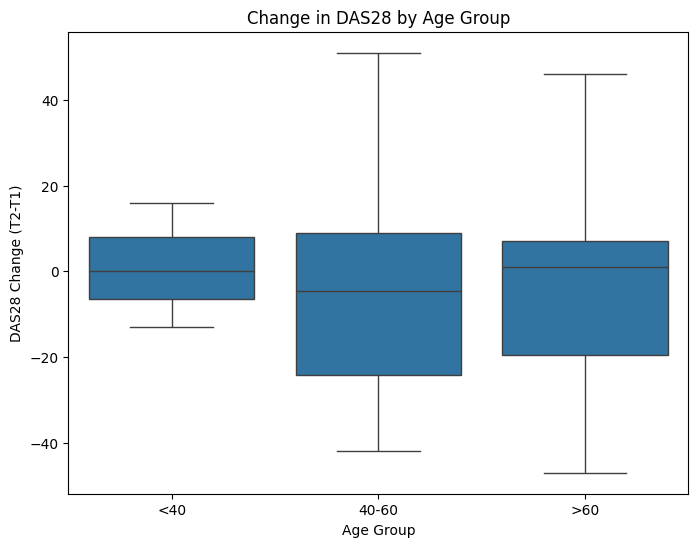

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Age_Group', y='DAS28_change', data=ra_dataset)
plt.title('Change in DAS28 by Age Group')
plt.ylabel('DAS28 Change (T2-T1)')
plt.xlabel('Age Group')
plt.show()
